In [1]:
#https://www.kaggle.com/code/rtatman/six-steps-to-more-professional-data-science-code/notebook
#https://towardsdatascience.com/8-guidelines-to-create-professional-data-science-notebooks-97572894b2e5

#API to use Elexon Apis better
#https://github.com/OSUKED/ElexonDataPortal
#https://osuked.github.io/ElexonDataPortal/08-quick-start/

#https://machinelearningmastery.com/pytorch-tutorial-develop-deep-learning-models/


In [83]:
from ElexonDataPortal import api
import requests
import pandas as pd
import io
from ElexonDataPortal import dev
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [22]:
client = api.Client('52g2ac5kwwh5chc')
client

In [23]:
pd.Series(client.methods).head()

get_B0610                  Actual Total Load per Bidding Zone
get_B0620      Day-Ahead Total Load Forecast per Bidding Zone
get_B0630     Week-Ahead Total Load Forecast per Bidding Zone
get_B0640    Month-Ahead Total Load Forecast Per Bidding Zone
get_B0650     Year Ahead Total Load Forecast per Bidding Zone
dtype: object

In [68]:
#parameters required per api call
print(client.get_B1780.__doc__)
print(client.get_B1770.__doc__)
print(client.get_B1810.__doc__)
#time period
start_date = '2020-01-01'
end_date = '2020-01-01 1:30'


        Aggregated Imbalance Volumes
        
        Parameters:
            start_date (str)
            end_date (str)
        

        Imbalance Prices
        
        Parameters:
            start_date (str)
            end_date (str)
        

        Cross-Border Balancing Volumes of Exchanged Bids and Offers
        
        Parameters:
            start_date (str)
            end_date (str)
        


In [29]:
#Aggregated Imbalance Volumes
# response_aggreated_imbalance_volumes = requests.get("""https://api.bmreports.com/BMRS/B1780/<v1>?APIKey=52g2ac5kwwh5chc&SettlementDate=<2014-12-31
# >&Period=<1>&ServiceType=<xml/csv>""")
df_B1780 = client.get_B1780(start_date, end_date)
#df_B1780 = list(df_B1780)
df_B1780.head(3)

B1780:   0%|          | 0/3 [00:00<?, ?it/s]


ValueError: The returned `data_content` must be one of: `list` or `OrderedDict`

In [90]:
# Imbalance Prices
df_B1770 = client.get_B1770(start_date, end_date)


B1770:   0%|          | 0/3 [00:00<?, ?it/s]C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\ElexonDataPortal\dev\orchestrator.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_SP)
B1770:  33%|███▎      | 1/3 [00:00<00:00,  8.15it/s]C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\ElexonDataPortal\dev\orchestrator.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_SP)
B1770:  67%|██████▋   | 2/3 [00:00<00:00,  5.29it/s]C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\ElexonDataPortal\dev\orchestrator.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_SP)
B1770: 100%|██████████| 3/3 [00:00<00:00,  5.03it/s]


In [91]:
#check for nas no nas in the whole table 
#df_B1770.isna().sum()
#numerical varaibles 
df_B1770['imbalancePriceAmountGBP'] = df_B1770['imbalancePriceAmountGBP'].astype('float')
df_B1770['settlementPeriod'] = df_B1770['settlementPeriod'].astype('int')
df_B1770['documentRevNum'] = df_B1770['documentRevNum'].astype('int')

df_B1770.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype                        
---  ------                   --------------  -----                        
 0   local_datetime           6 non-null      datetime64[ns, Europe/London]
 1   timeSeriesID             6 non-null      object                       
 2   businessType             6 non-null      object                       
 3   controlArea              6 non-null      object                       
 4   settlementDate           6 non-null      object                       
 5   settlementPeriod         6 non-null      int32                        
 6   imbalancePriceAmountGBP  6 non-null      float64                      
 7   priceCategory            6 non-null      object                       
 8   curveType                6 non-null      object                       
 9   resolution               6 non-null      object           

In [92]:
#categorical #note for the data currently got this might have just one level
#df_B1770['priceCategory'].unique()
df_B1770['businessType'] = df_B1770['businessType'].astype('category')
df_B1770['activeFlag'] = df_B1770['activeFlag'].astype('category')
df_B1770['documentType'] = df_B1770['documentType'].astype('category')
df_B1770['processType'] = df_B1770['processType'].astype('category')
df_B1770['docStatus'] = df_B1770['docStatus'].astype('category')
df_B1770['curveType'] = df_B1770['curveType'].astype('category')
df_B1770['priceCategory'] = df_B1770['priceCategory'].astype('category')




In [93]:
#datetime, extract the settlement times which are every 30 mins 
#df_B1770.info()
import datetime as dt
df_B1770['local_time'] = pd.to_datetime(df_B1770['local_datetime'], format='%H%M').dt.time

In [89]:
#drop local_datetime column 
df_B1770.drop(columns = ['local_datetime'], axis=1, inplace = True)

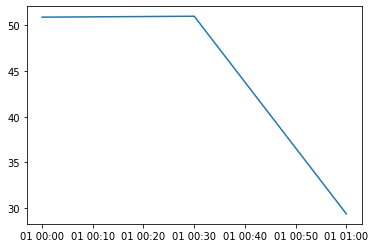

In [98]:
#df_B1770.head()
plt.plot( df_B1770["local_datetime"], df_B1770["imbalancePriceAmountGBP"] )
plt.show()
#plot the price as a #timeseriesgraph
#group by settlement period and localtime
#plot localtime against the prices

In [ ]:
#EDA, brief,
#correlation matrix
#aroundthedependenvariable

In [ ]:
#prep data for basic linear regression forcasting test on all data no train test split
#make catvariables dummmy vaiables 
#statsmodels pacakage in pandas.

In [15]:
#df_B1770.head(3)
#datacleaning and processing of price data

#target variable(imbalancePriceAmountGBP)

#numerical varaibles 
#stettlementPeriod
#imbalancePriceAmountGBP
#documentRevNum

#categorical
#priceCategory
#curveType
#processType
#activeFlag
#documentType
#processType
#activeFlag
#docStatus

#datetime
#local_datetime
#maketodatetimmeworking
#break into day, year, hour, time
#settlementDate, day, hr, year

#string
#resolution
#timeSeriesID
#controlArea
#resolution
#documentID	

#feature engineering #add a pct_change column

#brief ESDA, check histogram of imabalanceprice, 

#make dummy variables, train to test set 80-20%

#Linear regression and Forecasting baseline model

#https://blog.paperspace.com/time-series-forecasting-regression-and-lstm/

#https://www.kaggle.com/code/ryanholbrook/linear-regression-with-time-series/tutorial

#https://moodle.ucl.ac.uk/pluginfile.php/4336726/mod_resource/content/0/lecture5.pdf


,local_datetime,timeSeriesID,businessType,controlArea,settlementDate,settlementPeriod,imbalancePriceAmountGBP,priceCategory,curveType,resolution,documentType,processType,activeFlag,docStatus,documentID,documentRevNum
0,2020-01-01 00:00:00+00:00,ELX-EMFIP-IMBP-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,1,50.9,Insufficient balance,Sequential fixed size block,PT30M,Imbalance prices,Realised,Y,Final,ELX-EMFIP-IMBP-22437930,1
1,2020-01-01 00:00:00+00:00,ELX-EMFIP-IMBP-TS-2,Balance energy deviation,10YGB----------A,2020-01-01,1,50.9,Excess balance,Sequential fixed size block,PT30M,Imbalance prices,Realised,Y,Final,ELX-EMFIP-IMBP-22437930,1
2,2020-01-01 00:30:00+00:00,ELX-EMFIP-IMBP-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,2,51,Insufficient balance,Sequential fixed size block,PT30M,Imbalance prices,Realised,Y,Final,ELX-EMFIP-IMBP-22438072,1


In [20]:
#CrossBorder Balancing Volumes of Exchanged Bids and Offers
df_B1810 = client.get_B1810(start_date, end_date)
df_B1810.head(3)

B1810:   0%|          | 0/3 [00:00<?, ?it/s]C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\ElexonDataPortal\dev\utils.py:29: UserWarning: Data request was succesful but no content was returned
  warn(f'Data request was succesful but no content was returned')
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\ElexonDataPortal\dev\orchestrator.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_SP)
B1810:  33%|███▎      | 1/3 [00:00<00:01,  1.58it/s]C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\ElexonDataPortal\dev\utils.py:29: UserWarning: Data request was succesful but no content was returned
  warn(f'Data request was succesful but no content was returned')
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\ElexonDataPortal\dev\orchestrator.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

""


In [19]:
#numerical varaibles 
#stettlementPeriod
#imbalancePriceAmountGBP
#documentRevNum

#categorical
#priceCategory
#curveType
#processType
#activeFlag
#documentType
#processType
#activeFlag

df_B1810.head(3)

NameError: name 'df_B1810' is not defined

In [31]:
#Day-ahead Aggregated Generation
df_B1430 = client.get_B1430(start_date, end_date)
df_B1430.head(3)

B1430:   0%|          | 0/3 [00:00<?, ?it/s]


ValueError: The returned `data_content` must be one of: `list` or `OrderedDict`

In [20]:
# Imbalance Prices
response_imbalance_prices = requests.get("""https://api.bmreports.com/BMRS/B1770/v1?APIKey=52g2ac5kwwh5chc&SettlementDate=<SettlementDate>&
Period=<Period>&ServiceType=<xml/csv>""")

print(response_imbalance_prices)

<Response [200]>


In [14]:
#CrossBorder Balancing Volumes of Exchanged Bids and Offers
response_crossborder_balancing_volumes = requests.get("""https://api.bmreports.com/BMRS/B1810/<VersionNo>?APIKey=52g2ac5kwwh5chc&SettlementDate=<2014-12-31
>&Period=<1>&ServiceType=<xml/csv>""")


print(response_crossborder_balancing_volumes)



<Response [200]>


In [ ]:
#plot the graph as it is
#run simple linear regression with price and day (before develing into the data)
#check for correltion and autocorrelation
#checkforpercentage change.